# Example: Gaussian Mixture

- 2020-11-29 first uploaded
- 2021-04-08 backward loss updated

In [1]:
%reset -sf

import matplotlib.pyplot as plt
import numpy as np
import itertools
from flow import *
from utils import *
import get_data as gd
import gc

import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())
!python --version

2023-10-30 06:05:11.421155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Python 3.10.12


In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from getpass import getpass

# Sender's email (you can set it to 'root' or any other email address)
sender_email = 'root'
password = getpass(prompt='Enter your email password: ')

# Receiver's email
receiver_email = 'yygarypeng@gapp.nthu.edu.tw'

# Create a message object
message = MIMEMultipart()
message['From'] = sender_email
message['To'] = receiver_email
message['Subject'] = 'Subject of the email'

# Email body
body = 'This is the body of the email.'
message.attach(MIMEText(body, 'plain'))

# Create an SMTP server connection
try:
    smtp_server = smtplib.SMTP('smtp.example.com', 587)  # Replace with your SMTP server and port
    smtp_server.starttls()
    smtp_server.login(sender_email, password)

    # Send the email
    text = message.as_string()
    smtp_server.sendmail(sender_email, receiver_email, text)
    print('Email sent successfully!')

except Exception as e:
    print(f'An error occurred: {str(e)}')

finally:
    smtp_server.quit()

## Settings

In [75]:
processor = gd.DataProcessor()
path = "/root/work/truth/signal/*npz"
processor.load_files(path)

CGLMP, Higgs, LeadLep, LepM, LepP, NuM, NuP, MET, Wm, Wp, diLep, SubLep, Xi = processor.files

lep_kin = processor.process_lep(LepP, LepM)
print("lep_kin shape:", lep_kin.shape)
# lep_kin.head(5)

# observed (Y)
nu_kin = processor.process_MET(MET)
print("MET_kin shape:", nu_kin.shape)
# nu_kin.head(5)

# interest (X)
dinu_kin = processor.process_dinu(NuP, NuM)
print("dinu_kin shape:", dinu_kin.shape)
# dinu_kin.head(5)

CGLMP_kin = processor.process_CGLMP(CGLMP)
print("CGLMP shape:", CGLMP_kin.shape)
# CGLMP_kin.head(5)

del processor  # Clear the instance
gc.collect()

['/root/work/truth/signal/CGLMP.npz', '/root/work/truth/signal/Higgs.npz', '/root/work/truth/signal/LeadLepton.npz', '/root/work/truth/signal/LeptonM.npz', '/root/work/truth/signal/LeptonP.npz', '/root/work/truth/signal/LmNu.npz', '/root/work/truth/signal/LpNu.npz', '/root/work/truth/signal/MET.npz', '/root/work/truth/signal/WmBoson.npz', '/root/work/truth/signal/WpBoson.npz', '/root/work/truth/signal/diLepton.npz', '/root/work/truth/signal/subLeadLepton.npz', '/root/work/truth/signal/xi_xyz.npz']
lep_kin shape: (2928862, 8)
MET_kin shape: (2928862, 4)
dinu_kin shape: (2928862, 4)
CGLMP shape: (2928862, 3)


3691

In [76]:
# plt.hist(dinu_kin["nu_pz"], bins=50)
# plt.title("Original nu_pz")
# print(dinu_kin["nu_pz"].max(), dinu_kin["nu_pz"].min())
# print("std:", dinu_kin["nu_pz"].std())
# print("mean:", dinu_kin["nu_pz"].mean())
# print("Tot evt:", len(dinu_kin["nu_pz"]))
# plt.show()
# plt.close()

# from sklearn.preprocessing import StandardScaler

# SCALAR = StandardScaler()
# nu_pz_std = SCALAR.fit_transform(
#     [[x] for x in dinu_kin["nu_pz"]]
# ).flatten()  # zero mean and unit variance
# plt.hist(nu_pz_std, bins=50)
# plt.title("Before sampling nu_pz_std")
# # plt.show()
# plt.close()
# print(nu_pz_std.max(), nu_pz_std.min())
# print("std:", nu_pz_std.std())
# print("Tot evt:", len(nu_pz_std))

In [35]:
# # Undersampling to an uniform distribution

# n = int(10)
# step = (nu_pz_std.max() - nu_pz_std.min()) / n
# intervals = [nu_pz_std.min() + i * step for i in range(n)]

# sampling = int(10)
# indices_arr = np.empty((n - 1, sampling), dtype=int)
# for i in range(n - 1):
# 	indices_arr[i] = np.random.choice(
# 		np.where((intervals[i] < nu_pz_std) * (nu_pz_std <= intervals[i + 1]))[0],
# 		size=sampling,
# 		replace=True,
# 	)

In [36]:
# plt.hist(CGLMP["Bxy"], bins=50)
# plt.title("Original Bxy")
# print(CGLMP["Bxy"].max(), CGLMP["Bxy"].min())
# print("std:", CGLMP["Bxy"].std())
# print("mean:", CGLMP["Bxy"].mean())
# print("Tot evt:", len(CGLMP["Bxy"]))
# # plt.show()
# plt.close()

# from sklearn.preprocessing import StandardScaler

# SCALAR = StandardScaler()
# Bxy_std = SCALAR.fit_transform(
#     [[x] for x in CGLMP["Bxy"]]
# ).flatten()  # zero mean and unit variance
# plt.hist(Bxy_std, bins=50)
# plt.title("Before sampling Bxy_std")
# # plt.show()
# plt.close()
# print(Bxy_std.max(), Bxy_std.min())
# print("std:", Bxy_std.std())
# print("Tot evt:", len(Bxy_std))

In [37]:
# # Undersampling to an uniform distribution

# n = int(50)
# step = (Bxy_std.max() - Bxy_std.min()) / n
# intervals = [Bxy_std.min() + i * step for i in range(n)]

# sampling = int(50)
# indices_arr = np.empty((n - 1, sampling), dtype=int)
# for i in range(n - 1):
#     try:
#         indices_arr[i] = np.random.choice(
#             np.where((intervals[i] < Bxy_std) * (Bxy_std <= intervals[i + 1]))[0],
#             size=sampling,
#             replace=False,
#         )
#     except ValueError:
#         print("Cannot take a larger sample than population when 'replace=False'")
#         break

In [160]:
from sklearn.model_selection import train_test_split

indices_arr = np.arange(1e2, dtype=int)

lepton_features = [
    "lep_p_E",
    "lep_p_px",
    "lep_p_py",
    "lep_p_pz",
    "lep_m_E",
    "lep_m_px",
    "lep_m_py",
    "lep_m_pz",
]
neutrino_features = [
    "di_nu_E", 
    "di_nu_px", 
    "di_nu_py", 
    "di_nu_pz",
]

def reshape_features_lep(inputs, features):
    outputs = np.stack([inputs[features[0:4]], inputs[features[4:8]]], axis=1)
    return outputs


def reshape_features_dinu(inputs, features):
    outputs = np.expand_dims(inputs[features[0::]].to_numpy(), axis=1)
    return outputs


train_indices, temp_indices = train_test_split(
    indices_arr.flatten(), train_size=0.8, test_size=0.2, random_state=42
)
valid_indices, test_indices = train_test_split(
    temp_indices, train_size=0.5, test_size=0.5, random_state=42
)

lep_train = reshape_features_lep(lep_kin.iloc[train_indices], lepton_features)
lep_valid = reshape_features_lep(lep_kin.iloc[valid_indices], lepton_features)
lep_test = reshape_features_lep(lep_kin.iloc[test_indices], lepton_features)

# interest (X)
dinu_train = np.expand_dims(dinu_kin.to_numpy()[train_indices], axis=1)
dinu_valid = np.expand_dims(dinu_kin.to_numpy()[valid_indices], axis=1)
dinu_test = np.expand_dims(dinu_kin.to_numpy()[test_indices], axis=1)

# observed (Y)
nu_train = np.expand_dims(nu_kin.to_numpy()[train_indices][:,1:3], axis=1)
nu_valid = np.expand_dims(nu_kin.to_numpy()[valid_indices][:,1:3], axis=1)
nu_test = np.expand_dims(nu_kin.to_numpy()[test_indices][:,1:3], axis=1)

def stack_parts(input1, input2):
    outputs = np.concatenate([input1.flatten(), input2.flatten()], axis=0)
    return outputs

# print(f"Training data shape: {lep_train.shape}\nTesting data shape: {lep_test.shape}\nValidation data shape: {lep_valid.shape}")
train_x = stack_parts(lep_train, dinu_train)
valid_x = stack_parts(lep_valid, dinu_valid)
test_x = stack_parts(lep_test, dinu_test)
train_y = stack_parts(lep_train, nu_train)
valid_y = stack_parts(lep_valid, nu_valid)
test_y = stack_parts(lep_test, nu_test)

print(
	f"X (Interest)\nTraining data shape: {train_x.shape}\nTesting data shape: {test_x.shape}\nValidation data shape: {valid_x.shape}"
)
print()
print(
	f"Y (Observed)\nTraining data shape: {train_y.shape}\nTesting data shape: {test_y.shape}\nValidation data shape: {valid_y.shape}"
)

del (
    train_indices,
    temp_indices,
    valid_indices,
    test_indices,
    lep_train,
    lep_valid,
    lep_test,
    nu_train,
    nu_valid,
    nu_test,
)
gc.collect()

X (Interest)
Training data shape: (960,)
Testing data shape: (120,)
Validation data shape: (120,)

Y (Observed)
Training data shape: (800,)
Testing data shape: (100,)
Validation data shape: (100,)


0

In [169]:
# TODO
# interest (momentum)
x_dim = 2*4 + 4
# observed (MET)
y_dim = 2*4 + 2
z_dim =  x_dim - y_dim

tot_dim = y_dim + z_dim
pad_dim = tot_dim - x_dim

# Preprocess
y_hat = np.zeros((train_y.reshape(-1, y_dim).shape[0], y_dim))
for i in range(train_y.reshape(-1, y_dim).shape[0]):
	arr = train_y.reshape(-1, y_dim)[i]
	y_hat[i] = np.pad(arr, (0, y_dim-arr.shape[0]), mode="constant", constant_values=0)

## Pad data
X = train_x.reshape((-1, x_dim))
print("X", X.shape)
print("pad_dim", pad_dim)
pad_x = np.zeros((X.shape[0], pad_dim))
print("pad_x", pad_x.shape)
x = np.concatenate([X, pad_x], axis=-1).astype("float32")
print("x", x.shape)
z = np.random.multivariate_normal([0.]*z_dim, np.eye(z_dim), X.shape[0]).astype("float32")
y = np.concatenate([z, y_hat], axis=-1).astype("float32")
print("y", y.shape)
print("z", z.shape)

n_sample = X.shape[0]
n_data = n_sample * train_y.flatten().shape[0]
n_couple_layer = 3
n_hid_layer = 3
n_hid_dim = 512

n_batch = 50
n_epoch = 10
n_display = 1

# Make dataset generator
x_data = tf.data.Dataset.from_tensor_slices(x)
y_data = tf.data.Dataset.from_tensor_slices(y)
dataset = (tf.data.Dataset.zip((x_data, y_data))
           .shuffle(buffer_size=X.shape[0])
           .batch(n_batch, drop_remainder=True)
           .repeat())

X (80, 12)
pad_dim 0
pad_x (80, 0)
x (80, 12)
y (80, 12)
z (80, 2)


## Initialize the model

In [170]:
model = NVP(tot_dim, n_couple_layer, n_hid_layer, n_hid_dim, name="NVP")
x = tfk.Input((tot_dim,))
model(x)
model.summary()

Model: "NVP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer0 (TwoNVPCouplingLaye  multiple                  1070116   
 rs)                                                             
                                                                 
 Layer1 (TwoNVPCouplingLaye  multiple                  1070116   
 rs)                                                             
                                                                 
 Layer2 (TwoNVPCouplingLaye  multiple                  1070116   
 rs)                                                             
                                                                 
Total params: 3210348 (12.25 MB)
Trainable params: 3210312 (12.25 MB)
Non-trainable params: 36 (288.00 Byte)
_________________________________________________________________


In [171]:
class Trainer(tfk.Model):
    def __init__(self, model, x_dim, y_dim, z_dim, tot_dim, 
                 n_couple_layer, n_hid_layer, n_hid_dim, shuffle_type="reverse"):
        super(Trainer, self).__init__()
        self.model = model
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.z_dim = z_dim
        self.tot_dim = tot_dim
        self.x_pad_dim = tot_dim - x_dim
        self.y_pad_dim = tot_dim - (y_dim + z_dim)
        self.n_couple_layer = n_couple_layer
        self.n_hid_layer = n_hid_layer
        self.n_hid_dim = n_hid_dim
        self.shuffle_type = shuffle_type

        self.w1 = 5.
        self.w2 = 1.
        self.w3 = 10.
        self.loss_factor = 1.
        self.loss_fit = MSE
        self.loss_latent = MMD_multiscale
        self.loss_backward = MMD_multiscale

    def train_step(self, data): 
        x_data, y_data = data
        x = x_data[:, :self.x_dim]
        y = y_data[:, -self.y_dim:]
        z = y_data[:, :self.z_dim]
        # print("x", x.shape)
        # print("y", y.shape)
        # print("z", z.shape)
        # print("x_data", x_data.shape)
        y_short = tf.concat([z, y], axis=-1)
        # print("y_short", y_short.shape)

        # Forward loss
        with tf.GradientTape() as tape:
            y_out = self.model(x_data)    
            pred_loss = self.w1 * self.loss_fit(y_data[:,self.z_dim:], y_out[:,self.z_dim:]) # [zeros, y] <=> [zeros, yhat]
            # print(y_out)
            # print("!!!!!!!")
            # print("z_dim", z_dim)
            # print("y_dim", y_dim)
            # print(y_out[:, :self.z_dim])
            # print(y_out[:, -self.y_dim:])
            output_block_grad = tf.concat([y_out[:, :self.z_dim], y_out[:, -self.y_dim:]], axis=-1) # take out [z, y] only (not zeros)
            # print("y_out", y_short)
            # print("output", output_block_grad)
            latent_loss = self.w2 * self.loss_latent(y_short, output_block_grad) # [z, y] <=> [zhat, yhat]
            forward_loss = pred_loss + latent_loss
            # print(latent_loss)
            # print(forward_loss)
        grads_forward = tape.gradient(forward_loss, self.model.trainable_weights)
        self.optimizer.apply_gradients(zip(grads_forward, self.model.trainable_weights))

        # Backward loss
        with tf.GradientTape() as tape:
            x_rev = self.model.inverse(y_data)
            #rev_loss = self.w3 * self.loss_factor * self.loss_fit(x_rev, x_data)
            rev_loss = self.w3 * self.loss_factor * self.loss_backward(x_rev, x_data)
        grads_backward = tape.gradient(rev_loss, self.model.trainable_weights)
        self.optimizer.apply_gradients(zip(grads_backward, self.model.trainable_weights)) 

        total_loss = forward_loss + latent_loss + rev_loss
        return {"total_loss": total_loss,
                "forward_loss": forward_loss,
                "latent_loss": latent_loss,
                "rev_loss": rev_loss}

    def test_step(self, data):
        x_data, y_data = data
        return NotImplementedError

In [172]:
trainer = Trainer(model, x_dim, y_dim, z_dim, tot_dim, n_couple_layer, n_hid_layer, n_hid_dim)
trainer.compile(optimizer="Adam")

## Train the model

In [173]:
LossFactor = UpdateLossFactor(n_epoch)
logger = NBatchLogger(n_display, n_epoch)
hist = trainer.fit(dataset,
                   batch_size=n_batch,
                   epochs=n_epoch,
                   steps_per_epoch=n_data//n_batch,
                   callbacks=[logger, LossFactor],
                   verbose=0)

=== Started at 2023-10-26 11h:46m:07s ===
 2023-10-26 11h:46m:44s | Epoch: 01/10 | total_loss=156.061478 forward_loss=154.741333 latent_loss=0.120005 rev_loss=1.200136
 2023-10-26 11h:47m:12s | Epoch: 02/10 | total_loss=236.889587 forward_loss=235.569443 latent_loss=0.119999 rev_loss=1.200145
 2023-10-26 11h:47m:41s | Epoch: 03/10 | total_loss=20.567030 forward_loss=19.246876 latent_loss=0.119996 rev_loss=1.200159
 2023-10-26 11h:48m:10s | Epoch: 04/10 | total_loss=4.338156 forward_loss=3.018025 latent_loss=0.120000 rev_loss=1.200132
 2023-10-26 11h:48m:38s | Epoch: 05/10 | total_loss=5.492261 forward_loss=4.172139 latent_loss=0.119994 rev_loss=1.200128
 2023-10-26 11h:49m:07s | Epoch: 06/10 | total_loss=6380.118164 forward_loss=6378.797852 latent_loss=0.120002 rev_loss=1.200144
 2023-10-26 11h:49m:37s | Epoch: 07/10 | total_loss=14.293342 forward_loss=12.973236 latent_loss=0.119984 rev_loss=1.200122
 2023-10-26 11h:50m:05s | Epoch: 08/10 | total_loss=2.990214 forward_loss=1.670099 lat

## Check results

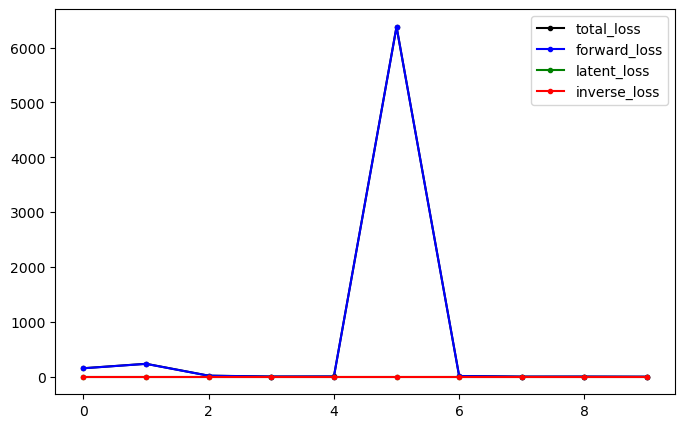

In [174]:
fig, ax = plt.subplots(1, facecolor="white", figsize=(8,5))
ax.plot(hist.history["total_loss"], "k.-", label="total_loss")
ax.plot(hist.history["forward_loss"], "b.-", label="forward_loss")
ax.plot(hist.history["latent_loss"], "g.-", label="latent_loss")
ax.plot(hist.history["rev_loss"], "r.-", label="inverse_loss")
plt.legend()

In [196]:
# Preprocess
y_hat = np.zeros((test_y.reshape(-1, y_dim).shape[0], y_dim))
for i in range(test_y.reshape(-1, y_dim).shape[0]):
	arr = test_y.reshape(-1, y_dim)[i]
	y_hat[i] = np.pad(arr, (0, y_dim-arr.shape[0]), mode="constant", constant_values=0)

z = np.random.multivariate_normal([1.]*z_dim, np.eye(z_dim), y_hat.shape[0])
y = np.concatenate([z, y_hat], axis=-1).astype("float32")
x_pred = model.inverse(y).numpy()
pz_pred = x_pred[:, -1]
E_pred = x_pred[:, -4]
x_truth = test_x.reshape(-1, x_dim)
pz_truth = x_truth[:, -1]
E_truth = x_truth[:, -4]

In [203]:
def plot_2d_histogram(pred, test, bins=50, title="TEST"):
    # Create the 2D histogram with specified bins
    hist, xedges, yedges = np.histogram2d(pred.flatten(), test, bins=(bins, bins))

    # Create a masked array to set empty regions to the specified color
    hist = np.ma.masked_where(hist == 0, hist)

    # Plot the 2D histogram with the specified color for empty regions
    fig = plt.figure(figsize=(8, 6), dpi=120)
    plt.pcolormesh(xedges, yedges, hist.T, cmap="viridis")
    cbar = plt.colorbar()
    cbar.set_label("Frequency")
    # min_scl = np.min([np.min(pred), np.min(test)])
    # max_scl = np.max([np.max(pred), np.max(test)])
    # plt.xlim([min_scl, max_scl])
    # plt.ylim([min_scl, max_scl])
    plt.xlim([-50, 50])
    plt.ylim([-50, 50])
    plt.xlabel("pred")
    plt.ylabel("true")
    plt.title(title)
    plt.show()
    plt.close()

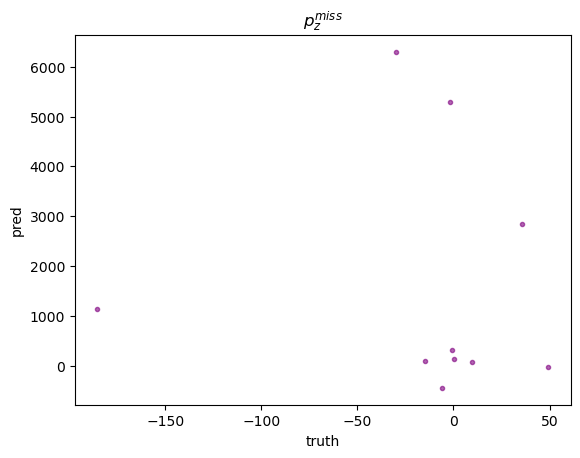

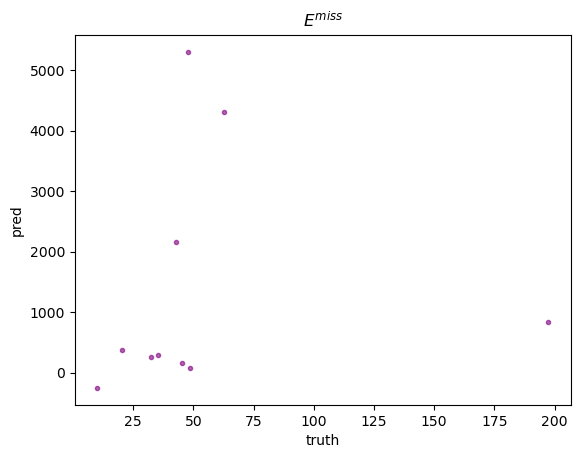

In [211]:
# plot_2d_histogram(pz_pred, pz_truth, r"$p^{miss}_{z}$")
plt.plot(pz_truth, pz_pred, ".", alpha=.3, color="purple")
plt.title(r"$p^{miss}_{z}$")
plt.xlabel("truth")
plt.ylabel("pred")
plt.savefig("pz.png")
plt.show()
plt.close()

plt.plot(E_truth, E_pred, ".", alpha=.3, color="purple")
plt.title(r"$E^{miss}$")
plt.xlabel("truth")
plt.ylabel("pred")
plt.savefig("energy.png")
plt.show()
plt.close()